In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import sklearn.metrics as mt
from sklearn.preprocessing import PolynomialFeatures

def generate_data(n):
    
    #prva klasa
    n1 = int(n/2)
    x1_1 = np.random.normal(0.0, 2, (n1,1));
    #x1_1 = .21*(6.*np.random.standard_normal((n1,1))); 
    x2_1 = np.power(x1_1,2) + np.random.standard_normal((n1,1));
    y_1 = np.zeros([n1,1])
    temp1 = np.concatenate((x1_1,x2_1,y_1),axis = 1)
    
    #druga klasa
    n2 = int(n - n/2)
    x_2 = np.random.multivariate_normal((0,10), [[0.8,0],[0,1.2]], n2);
    y_2 = np.ones([n2,1])
    temp2 = np.concatenate((x_2,y_2),axis = 1)
    
    data  = np.concatenate((temp1,temp2),axis = 0)
    
    #permutiraj podatke
    indices = np.random.permutation(n)    
    data = data[indices,:]
    
    return data

def plot_confusion_matrix(c_matrix):
    
    norm_conf = []
    for i in c_matrix:
        a = 0
        tmp_arr = []
        a = sum(i, 0)
        for j in i:
            tmp_arr.append(float(j)/float(a))
        norm_conf.append(tmp_arr)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    res = ax.imshow(np.array(norm_conf), cmap=plt.cm.Greys, interpolation='nearest')

    width = len(c_matrix)
    height = len(c_matrix[0])

    for x in range(width):
        for y in range(height):
            ax.annotate(str(c_matrix[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center', color = 'green', size = 20)

    fig.colorbar(res)
    numbers = '0123456789'
    plt.xticks(range(width), numbers[:width])
    plt.yticks(range(height), numbers[:height])
    
    plt.ylabel('Stvarna klasa')
    plt.title('Predvideno modelom')
    plt.show()

[[-9.77035045e-01  7.78357792e-01  9.54597478e-01 -7.60482840e-01
   6.05840853e-01]
 [ 1.43732074e+00  8.95604542e+00  2.06589092e+00  1.28727099e+01
   8.02107496e+01]
 [-2.17743947e+00  4.07358475e+00  4.74124264e+00 -8.86998422e+00
   1.65940927e+01]
 [-1.84442643e-01  1.05734695e+01  3.40190885e-02 -1.95019865e+00
   1.11798257e+02]
 [-1.99143519e+00  2.96734550e+00  3.96581412e+00 -5.90927625e+00
   8.80513930e+00]
 [-1.55287651e-01  1.11722186e+01  2.41142547e-02 -1.73490758e+00
   1.24818468e+02]
 [ 1.04520980e-01  3.43849728e-01  1.09246353e-02  3.59395106e-02
   1.18232635e-01]
 [-4.74656496e-01  1.05875164e+01  2.25298789e-01 -5.02543343e+00
   1.12095503e+02]
 [-1.54314039e-01  1.45304422e+00  2.38128226e-02 -2.24225123e-01
   2.11133752e+00]
 [-1.13375896e+00  9.08875044e+00  1.28540939e+00 -1.03044523e+01
   8.26053846e+01]
 [ 7.49767135e-02  1.13529650e+01  5.62150756e-03  8.51208005e-01
   1.28889815e+02]
 [ 1.63922781e+00  1.38435418e+00  2.68706780e+00  2.26927187e+00

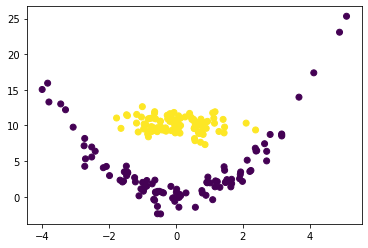

In [14]:
np.random.seed(242)
learn_data = generate_data(200)
test_data = generate_data(100)
poly = PolynomialFeatures(degree=2, include_bias = False)
ys = learn_data[:, -1]
xs = poly.fit_transform(learn_data[:,0:2])
print(xs)
plt.scatter(xs[:,0], xs[:,1], c=ys)
plt.show()

In [3]:
model = linear_model.LogisticRegression()
model = model.fit(xs, ys)
y_true = test_data[:, 2]
test_transformed = poly.fit_transform(test_data[:, 0:2])
prediction = model.predict(test_transformed)
intercept = model.intercept_
coef = model.coef_
print(intercept)
print(coef)

[-6.65890005]
[[ 2.86831888e-01  1.51190916e+00 -1.31893043e+00  8.91722808e-04
  -4.72295180e-03]]


[[-9.77035045e-01  7.78357792e-01  9.54597478e-01 -7.60482840e-01
   6.05840853e-01]
 [ 1.43732074e+00  8.95604542e+00  2.06589092e+00  1.28727099e+01
   8.02107496e+01]
 [-2.17743947e+00  4.07358475e+00  4.74124264e+00 -8.86998422e+00
   1.65940927e+01]
 [-1.84442643e-01  1.05734695e+01  3.40190885e-02 -1.95019865e+00
   1.11798257e+02]
 [-1.99143519e+00  2.96734550e+00  3.96581412e+00 -5.90927625e+00
   8.80513930e+00]
 [-1.55287651e-01  1.11722186e+01  2.41142547e-02 -1.73490758e+00
   1.24818468e+02]
 [ 1.04520980e-01  3.43849728e-01  1.09246353e-02  3.59395106e-02
   1.18232635e-01]
 [-4.74656496e-01  1.05875164e+01  2.25298789e-01 -5.02543343e+00
   1.12095503e+02]
 [-1.54314039e-01  1.45304422e+00  2.38128226e-02 -2.24225123e-01
   2.11133752e+00]
 [-1.13375896e+00  9.08875044e+00  1.28540939e+00 -1.03044523e+01
   8.26053846e+01]
 [ 7.49767135e-02  1.13529650e+01  5.62150756e-03  8.51208005e-01
   1.28889815e+02]
 [ 1.63922781e+00  1.38435418e+00  2.68706780e+00  2.26927187e+00

ValueError: X has 2 features per sample; expecting 5

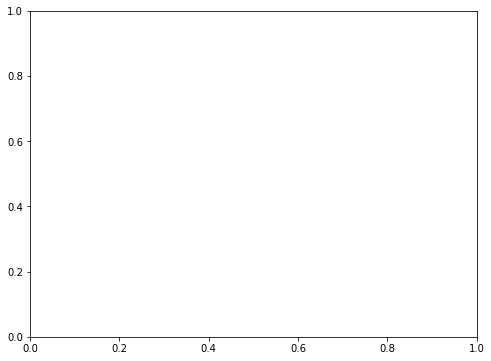

In [13]:
data_train = xs
f, ax = plt.subplots(figsize=(8, 6))
x_grid, y_grid = np.mgrid[min(data_train[:,0])-0.5:max(data_train[:,0])+0.5:.05,
                          min(data_train[:,1])-0.5:max(data_train[:,1])+0.5:.05]
grid = np.c_[x_grid.ravel(), y_grid.ravel()]
probs = model.predict_proba(grid)[:, 1].reshape(x_grid.shape)

cont = ax.contourf(x_grid, y_grid, probs, 60, cmap="Greys", vmin=0, vmax=1)

ax_c = f.colorbar(cont)
ax_c.set_label("$P(y = 1|\mathbf{x})$")
ax_c.set_ticks([0, .25, .5, .75, 1])
ax.set_xlabel('$x_1$', alpha=0.9)
ax.set_ylabel('$x_2$', alpha=0.9)
ax.set_title('Izlaz logisticke regresije')
plt.show()

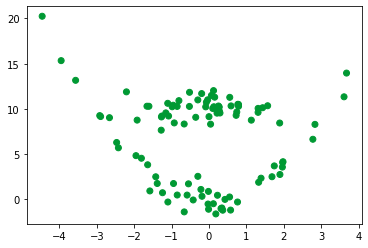

In [9]:
ziped = list(zip(test_data[:, 2], prediction))
color = list(map(lambda x: '#009933' if(x[0] == x[1]) else '#000000', ziped))
plt.scatter(test_data[:, 0], test_data[:, 1], c=color)
plt.show()

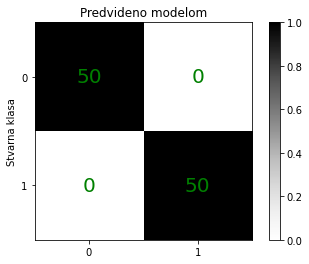

Accuracy = 1.0
Missclacification rate = 0.0
Precision = 1.0
Recall = 1.0
Specificity = 1.0


In [10]:
conf_matrix = mt.confusion_matrix(y_true, prediction)
plot_confusion_matrix(conf_matrix)
accuracy = mt.accuracy_score(y_true, prediction)
missclasification = 1-accuracy
precision = mt.precision_score(y_true, prediction)
recall = mt.recall_score(y_true, prediction)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn+fp)
print("Accuracy = {}".format(accuracy))
print("Missclacification rate = {}".format(missclasification))
print("Precision = {}".format(precision))
print("Recall = {}".format(recall))
print("Specificity = {}".format(specificity))